## DATA WRANGLING

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
           'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 
           'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
           'highway-mpg', 'price']

In [4]:
df=pd.read_csv("imports-85.data",names=headers)
df.replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for missing data

In [5]:
missing_data=df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [7]:
avg_norm_loss=df["normalized-losses"].astype("float").mean(axis=0)
print(avg_norm_loss)

122.0


In [8]:
df["normalized-losses"].replace(np.nan,avg_norm_loss, inplace=True)

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
df["price"]=df["price"].astype('float')

In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [12]:
df["price"].mean()

13207.129353233831

In [13]:
avg_bore=df["bore"].astype("float").mean(axis=0)

In [14]:
df["bore"].replace(np.nan,avg_bore, inplace=True)

In [15]:
avg_stroke=df["stroke"].astype("float").mean(axis=0) #mean on the rows axis=0

In [16]:
df["stroke"].replace(np.nan,avg_stroke,inplace=True)

In [17]:
avg_horsepower=df["horsepower"].astype("float").mean(axis=0)

In [18]:
df["horsepower"].replace(np.nan,avg_horsepower,inplace=True)

In [19]:
avg_peak=df["peak-rpm"].astype("float").mean(axis=0)

In [20]:
df["peak-rpm"].replace(np.nan,avg_peak,inplace=True)

In [21]:
#to see which values are present in a column we use the value counts method
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [22]:
#to show which one is the highest count automatically with the idxmax method
df["num-of-doors"].value_counts().idxmax()

'four'

In [23]:
#now that we know the most common door type is 4 then the nan values can be replaced with four
df["num-of-doors"].replace(np.nan,4,inplace=True)

In [24]:
#as for the price column we drop all the rows that lack value because we are suppossed to use it to predict
df.dropna(subset=["price"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df[["bore","stroke","price","peak-rpm"]]=df[["bore","stroke","price","peak-rpm"]].astype("float")
df["normalized-losses"]=df["normalized-losses"].astype("int")


In [27]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Data standardization

In [28]:
#DATA standardization is a type of data normalization the most common way is to
#divide the value by max-value but you can also do (value-mean value)/std 
#or (value-min value)/(max value-min value)

In [29]:
df["city-L/100km"]=235/df["city-mpg"]

In [30]:
df["highway-mpg"]=235/df["highway-mpg"]

In [31]:
df.rename(columns={"highway-mpg":"highway-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


#### Data normalization

In [32]:
#normalization is basically having the values in the same range for modelling. 
#Prevents on of the values taking wrong precedence of importance
#data can be normalized in 3 major ways
# 1. By dividing value my max value
# 2. By X-Xmin/(Xmax-Xmin) - X reps the values in a column
# 3. By X - mean / std deviation

In [33]:
#lst say for instance we need to normalize length, width and height so that their data ranges between 0-1
#we divide value by max value
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()

In [34]:
df[["height","width","height"]].head()
#the dimensions data is now in the range 0-1

,height,width,height
0,0.816054,0.890278,0.816054
1,0.816054,0.890278,0.816054
2,0.876254,0.909722,0.876254
3,0.908027,0.919444,0.908027
4,0.908027,0.922222,0.908027


#### Nomalization
Here we will create bins

In [35]:
#Nomralization is basically converting continous numerical data into discrete categorical bins
#lets nomralizize the horsepower. It has 59 unique continous numerical data ranging from 48 - 288
df["horsepower"].describe()

count     201
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [36]:
#convert to int 
df["horsepower"]=df["horsepower"].astype('int',copy=True)

In [37]:
df["horsepower"].dtype

dtype('int32')

Text(0.5, 1.0, 'Horsepower bin')

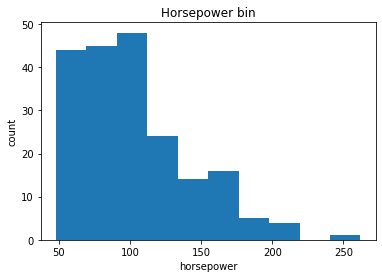

In [43]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.hist(df["horsepower"])

#lets now set labels
pyplot.xlabel('horsepower')
pyplot.ylabel('count')
pyplot.title('Horsepower bin')

In [51]:
#now we can create bins from this illutsration
# we will use linspace from numpys for this
#we need three bins so the divider will be four
bins=np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)

In [52]:
#create the names for these bins
group_names=["Low","Medium","High"]

In [54]:
#the cut method determined to which bin values in df["horsepower"] will belong to then we inlude_lowest =True
df["horsepower-bined"]=pd.cut(df["horsepower"],bins,labels=group_names, include_lowest=True)
df[["horsepower","horsepower-bined"]].head(20)

,horsepower,horsepower-bined
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [66]:
ez=df["horsepower-bined"].value_counts()
ez

Low       153
Medium     43
High        5
Name: horsepower-bined, dtype: int64

In [41]:
#we then plot a bar plot of groip_names againts value count in df["horsepower-bined"]
pyplot.bar(group_names,ez)
pyplot.xlabel("Horsepower")
pyplot.ylabel("count")
pyplot.title("Horsepower bins")

NameError: name 'group_names' is not defined

Text(0.5, 1.0, 'horsepower bins')

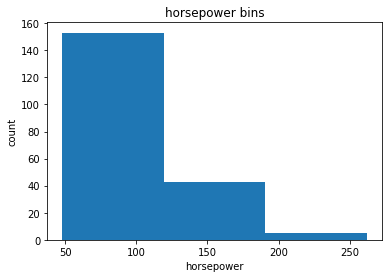

In [73]:
#now we visualize the bins
plt.pyplot.hist(df["horsepower"], bins = 3) #you can change th bins value

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#### Indicator variable/dummy variable

In [74]:
#dummy variables basically bear no specific meaning but can be used to make use of categorical data types in regression analysis
#the method get_dummies is used to get dummy variables from a column in the table
dummy_variable1=pd.get_dummies(df["fuel-type"])
dummy_variable1.head(10)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [78]:
# we can change the column name for clarity
#let's rename this stuff
dummy_variable1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_variable1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [97]:
#now we add the dummy data to the main table taht is df
#we insert it on axis=1 meaning on column. Axis 0 is rows
df=pd.concat([df,dummy_variable1],axis=1)
#next we drop the original fuel column

In [99]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-bined,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [100]:
dummy_variable2=pd.get_dummies(df["aspiration"])

In [104]:
dummy_variable2.rename(columns={"std":"aspiration-std","turbo":"aspiration turbo"},inplace=True)

In [106]:
dummy_variable2.value_counts()

aspiration-std  aspiration turbo
1               0                   165
0               1                    36
dtype: int64

In [108]:
df=pd.concat([df,dummy_variable2],axis=1)

In [109]:
df.drop()

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-bined', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration-std', 'aspiration turbo'],
      dtype='object')

In [110]:
df.drop("aspiration",axis=1,inplace=True)

In [112]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-bined,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [113]:
df.to_csv("clean_df.csv")

##### The end of data wrangling
so far we have seen removing ? in the data by replacing with np.nan
Then replacing the Nan values with mean or dropping rows completely where the column is the one building model i.e. price
creating bins
creating dummies and concatinating them to the main df
The replacing mean was on axis = 0
new columns added were on axis =1